In [1]:
pip install faker

In [2]:
from faker import Faker
import random
from datetime import datetime, timedelta
import pandas as pd
import numpy as np

Now I will create the 1st set of data that is generated from new users signing up on the app -
1. ID of every customer
2. Name of every customer
3. Age of every customer
4. Gender of every customer
5. Phone number of every customer
6. Email of every customer
7. Pan details of every customer
8. Bank details of every customer
9. Referred by a friend or not
10. Date of account creation

In [3]:
fake = Faker()

# Generate synthetic data for 10000 rows
data = []
for i in range(10000):
    name = fake.name()
    age = fake.random_int(min=18, max=80)
    gender = fake.random_element(elements=("Male", "Female"))
    phone_number = fake.phone_number()
    email = fake.email()
    pan_details = fake.random_int(min=1000000000, max=9999999999)
    bank_details = fake.random_element(elements=("HDFC", "ICICI", "AXIS", "SBI", "Kotak")) + " - XXXX XXXX"
    responses = fake.random_element(elements=('yes', 'no'))
    date_of_creation = fake.date_time_between(start_date="-5y", end_date="now").date()
    data.append([i+1, name, age, gender, phone_number, email, pan_details, bank_details, responses, date_of_creation])

# Create a DataFrame
columns = ["ID", "Name", "Age", "Gender", "Phone number", "Email", "Pan details", "Bank details", "Referred by friend", "Date of Account Creation"]
df1 = pd.DataFrame(data, columns=columns)

# Save DataFrame to CSV
df1.to_csv("Account creation dataset.csv", index=False)

In [4]:
df1

,ID,Name,Age,Gender,Phone number,Email,Pan details,Bank details,Referred by friend,Date of Account Creation
0,1,Janice Cook,80,Male,(765)290-5860x832,comptonkelly@example.net,4633141955,ICICI - XXXX XXXX,no,2022-07-19
1,2,Aimee Flores,37,Male,265-723-1682,yrichardson@example.net,4747573044,Kotak - XXXX XXXX,no,2020-02-08
2,3,Caitlin Mitchell,21,Female,633.771.6903x51918,chris48@example.org,8475447209,ICICI - XXXX XXXX,yes,2021-04-05
3,4,Jordan King,48,Male,3333251190,trevorjones@example.net,8746963415,SBI - XXXX XXXX,yes,2021-09-06
4,5,Angela Martin,57,Female,933-431-8718x936,hsimmons@example.com,4760849671,ICICI - XXXX XXXX,no,2020-10-05
...,...,...,...,...,...,...,...,...,...,...
9995,9996,Benjamin Duran,43,Male,5056218274,amy91@example.org,2404024729,Kotak - XXXX XXXX,yes,2022-08-19
9996,9997,Kyle Keller,69,Male,672-989-5444x398,carlahall@example.net,2141203664,AXIS - XXXX XXXX,no,2023-04-13
9997,9998,Alexis Hawkins,61,Female,263.286.2658,carla51@example.com,1845942942,ICICI - XXXX XXXX,no,2020-05-14
9998,9999,Christopher Barnes,80,Male,001-959-718-4943,banksdarrell@example.com,9935095897,HDFC - XXXX XXXX,no,2019-10-05


In [5]:
df1['Date of Account Creation'] = pd.to_datetime(df1['Date of Account Creation'])

In [6]:
start_date = '2023-01-01'
end_date = '2024-08-31'

filtered_df = df1[(df1['Date of Account Creation'] >= start_date) & (df1['Date of Account Creation'] <= end_date)]


num_accounts = len(filtered_df)


print(f"Number of accounts created between {start_date} and {end_date} : {num_accounts}.\nSo the new user acquisition during that timeframe is {num_accounts}.")


start_date_accounts = len(df1[df1['Date of Account Creation'] < start_date])
end_date_accounts = len(df1[df1['Date of Account Creation'] <= end_date])

growth_rate = (end_date_accounts - start_date_accounts) / start_date_accounts * 100

print(f"The growth rate between {start_date} and {end_date} is {growth_rate:.2f}%.")

Number of accounts created between 2023-01-01 and 2024-08-31 : 2178.
So the new user acquisition during that timeframe is 2178.
The growth rate between 2023-01-01 and 2024-08-31 is 27.84%.


In [7]:
male_count = len(filtered_df[filtered_df['Gender'] == 'Male'])
female_count = len(filtered_df[filtered_df['Gender'] == 'Female'])
print(f"The number of male users is {male_count}")
print(f"The number of female users is {female_count}")
print(f"The % of male users is {male_count/len(filtered_df)*100}%")
print(f"The % of female users is {female_count/len(filtered_df)*100}%")

The number of male users is 1105
The number of female users is 1073
The % of male users is 50.7346189164371%
The % of female users is 49.2653810835629%


Text(0.5, 1.0, 'Gender Distribution of New Users')

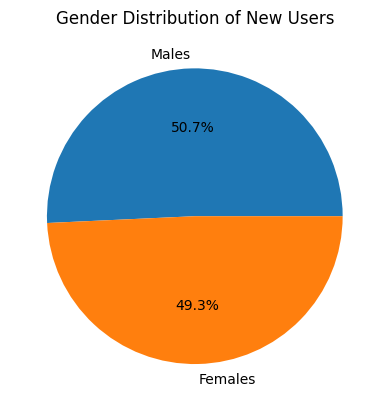

In [8]:
import matplotlib.pyplot as plt
plt.pie([male_count, female_count] ,  labels=['Males', 'Females'], autopct='%1.1f%%')
plt.title('Gender Distribution of New Users')

In [9]:
filtered_df['Age'].describe()

count    2178.000000
mean       48.832874
std        18.208373
min        18.000000
25%        33.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: Age, dtype: float64

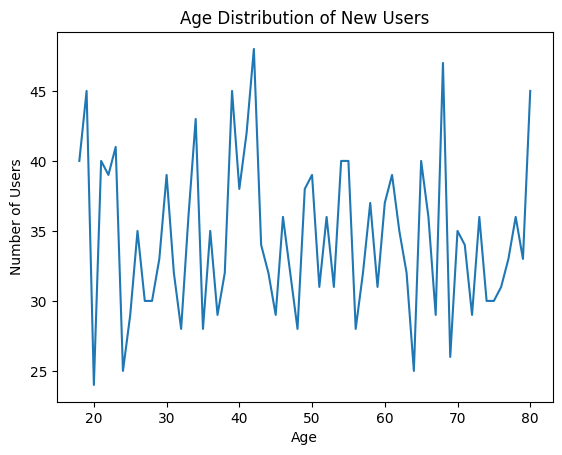

In [10]:
# Get the age distribution
age_distribution = filtered_df['Age'].value_counts().sort_index()

# Create the line plot
plt.plot(age_distribution.index, age_distribution.values)

plt.title('Age Distribution of New Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')

plt.show()

In [11]:
yes_count = len(filtered_df[filtered_df['Referred by friend'] == 'yes'])
no_count = len(filtered_df[filtered_df['Referred by friend'] == 'no'])

print(f"Number of users who referred by a friend: {yes_count}")
print(f"Number of users who not referred by a friend: {no_count}")

Number of users who referred by a friend: 1101
Number of users who not referred by a friend: 1077


Text(0.5, 1.0, 'Referral Distribution of New Users')

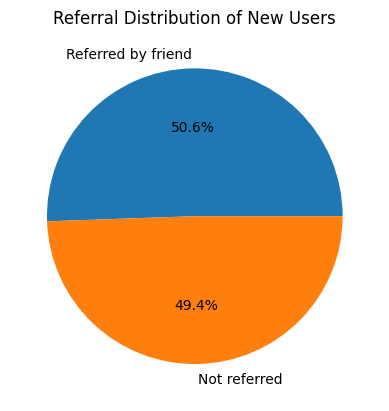

In [12]:
plt.pie([yes_count, no_count], labels=['Referred by friend', 'Not referred'], autopct='%1.1f%%')
plt.title('Referral Distribution of New Users')

In [13]:
customer_referred_percent = (yes_count/(yes_count + no_count))
print(f"So the likelihood of customers we get by referral the app is {customer_referred_percent*100}%")

So the likelihood of customers we get by referral the app is 50.55096418732782%


Now I will create the 2nd set of data that is generated from the app usage statistic -
1. Last app usage date of every customer
2. Total time spent on the app for every users
3. Total number of sessions done by the user on the app

In [14]:
names = df1["Name"].tolist()
ids = df1["ID"].tolist()

new_data = []
for i in range(len(names)):
    # Generate a random last login date within the last month
    days_ago = random.randint(0, 30)
    date = datetime.now() - timedelta(days=days_ago)

    # Generate a random last login time
    hours = random.randint(0, 23)
    minutes = random.randint(0, 59)
    seconds = random.randint(0, 59)
    time = date.replace(hour=hours, minute=minutes, second=seconds)

    time_spent_in_minutes = np.random.randint(1000, 5000)
    num_of_sessions = np.random.randint(100, 500)

    # Add the name, ID, and last login date/time to the new dataset
    new_data.append([names[i], ids[i], date, time, time_spent_in_minutes, num_of_sessions])

# Create a new DataFrame
df2 = pd.DataFrame(new_data, columns=["Name", "ID", "Last Login Date", "Last Login Time", "Total time spent", "No. of sessions"])

df2.to_csv("App usage statistics dataset.csv", index=False)

In [15]:
df2

,Name,ID,Last Login Date,Last Login Time,Total time spent,No. of sessions
0,Janice Cook,1,2024-01-23 16:40:09.612786,2024-01-23 08:06:39.612786,4068,395
1,Aimee Flores,2,2024-02-06 16:40:09.612904,2024-02-06 12:01:25.612904,2388,400
2,Caitlin Mitchell,3,2024-01-25 16:40:09.612934,2024-01-25 10:32:35.612934,4101,407
3,Jordan King,4,2024-01-20 16:40:09.612960,2024-01-20 23:23:25.612960,4740,489
4,Angela Martin,5,2024-01-28 16:40:09.612984,2024-01-28 23:31:26.612984,1781,330
...,...,...,...,...,...,...
9995,Benjamin Duran,9996,2024-01-26 16:40:09.895047,2024-01-26 10:18:22.895047,2154,439
9996,Kyle Keller,9997,2024-02-14 16:40:09.895070,2024-02-14 02:38:32.895070,4495,455
9997,Alexis Hawkins,9998,2024-02-14 16:40:09.895093,2024-02-14 12:58:09.895093,1976,202
9998,Christopher Barnes,9999,2024-02-08 16:40:09.895117,2024-02-08 10:44:06.895117,1215,410


In [16]:
calc_dau = len(df2[df2["Last Login Date"]==datetime.today().date()])
print(f"The total number of daily active users is {calc_dau}")

The total number of daily active users is 0


In [17]:
calc_mau = len(df2[df2["Last Login Date"] >= (datetime.today() - timedelta(days=30))])
print(f"The number of monthly active users (MAU) is: {calc_mau}")

The number of monthly active users (MAU) is: 9647


In [18]:
# now i want to find the percentage of users who stop to use our app within a month
x = len(df2) - calc_mau
churn_rate = (x/len(df2))
print(f"The user churn rate within a month is {churn_rate*100}%")
print(f"The user retention rate within a month is {(1-churn_rate)*100}%")

The user churn rate within a month is 3.53%
The user retention rate within a month is 96.47%


Text(0.5, 1.0, 'Retention Rate and Churn Rate Distribution After a Month')

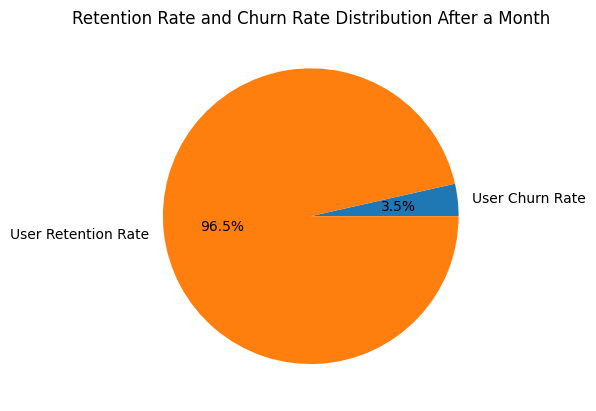

In [19]:
plt.pie([churn_rate*100,  (1-churn_rate)*100], labels = ['User Churn Rate','User Retention Rate'], autopct='%1.1f%%')
plt.title("Retention Rate and Churn Rate Distribution After a Month")

In [20]:
df2['Time spent per session'] = df2.apply(lambda row: row['Total time spent'] / row['No. of sessions'], axis=1)

In [21]:
total_time_spent_per_session = df2['Time spent per session'].sum()
average_time_spent_per_session = total_time_spent_per_session/len(df2)
print(f"The average time spent per session on the app is {average_time_spent_per_session} minutes")

The average time spent per session on the app is 12.067552582868846 minutes


In [22]:
df2['Time spent per session'].describe()

count    10000.000000
mean        12.067553
std          7.787594
min          2.062249
25%          6.553550
50%         10.076927
75%         15.171827
max         49.980000
Name: Time spent per session, dtype: float64

Now I will create the 3rd set of data that is generated when an user makes an investment. Here to simplify data generation, we assume that all the users have invested something -

1. Amount invested by each user
2. Fees and commisions charged from each user
3. Number of Schemes invested by the user
4. Number of transactions for each user

In [23]:
new_data = []

for i in range(len(names)):
    amount_invested = np.random.randint(100, 100001)
    fees = np.random.randint(100, 1000)
    commissions = np.random.randint(100, 1000)
    num_of_schemes_invested = np.random.randint(1,11)
    number_of_transactions = np.random.randint(1, 101)
    new_data.append([names[i], ids[i], amount_invested, fees, commissions, num_of_schemes_invested, number_of_transactions])

# Create a new DataFrame
df3 = pd.DataFrame(new_data, columns=["Name", "ID", "Total amount invested", "Fees", "Commissions", "Number of Schemes Invested", "No of Transactions"])

df3.to_csv("Users Investment Dataset.csv", index=False)

In [24]:
df3

,Name,ID,Total amount invested,Fees,Commissions,Number of Schemes Invested,No of Transactions
0,Janice Cook,1,24064,825,697,4,1
1,Aimee Flores,2,3802,325,749,1,100
2,Caitlin Mitchell,3,73344,949,527,10,54
3,Jordan King,4,12386,703,816,9,90
4,Angela Martin,5,47439,976,954,9,22
...,...,...,...,...,...,...,...
9995,Benjamin Duran,9996,13663,228,757,8,16
9996,Kyle Keller,9997,36277,787,694,6,82
9997,Alexis Hawkins,9998,53202,119,958,8,74
9998,Christopher Barnes,9999,69581,140,509,4,94


In [25]:
# now i will find out the assets under management
total_aum = df3["Total amount invested"].sum()
print(f"The total assets under management is {total_aum}")
average_aum = total_aum/(len(df3))
print(f"The assets under management per customer on average is {average_aum}")

The total assets under management is 504082794
The assets under management per customer on average is 50408.2794


In [26]:
df3["Total amount invested"].describe()

count    10000.000000
mean     50408.279400
std      28784.180098
min        127.000000
25%      25267.750000
50%      50849.500000
75%      75223.500000
max      99992.000000
Name: Total amount invested, dtype: float64

In [27]:
df3['Revenue'] = df3.apply(lambda row: row['Fees'] + row['Commissions'], axis=1)

In [28]:
df3

,Name,ID,Total amount invested,Fees,Commissions,Number of Schemes Invested,No of Transactions,Revenue
0,Janice Cook,1,24064,825,697,4,1,1522
1,Aimee Flores,2,3802,325,749,1,100,1074
2,Caitlin Mitchell,3,73344,949,527,10,54,1476
3,Jordan King,4,12386,703,816,9,90,1519
4,Angela Martin,5,47439,976,954,9,22,1930
...,...,...,...,...,...,...,...,...
9995,Benjamin Duran,9996,13663,228,757,8,16,985
9996,Kyle Keller,9997,36277,787,694,6,82,1481
9997,Alexis Hawkins,9998,53202,119,958,8,74,1077
9998,Christopher Barnes,9999,69581,140,509,4,94,649


In [29]:
total_revenue = df3['Revenue'].sum()
print(f"The total revenue of the app is {total_revenue}")
print(f"The average revenue per user is {total_revenue/len(df3)}")

The total revenue of the app is 10980335
The average revenue per user is 1098.0335


In [30]:
df3['Revenue'].describe()

count    10000.000000
mean      1098.033500
std        367.934301
min        200.000000
25%        832.000000
50%       1098.000000
75%       1358.000000
max       1979.000000
Name: Revenue, dtype: float64

In [31]:
Transaction_frequency_per_user = (df3['No of Transactions'].sum())/len(df3)
print(f"The transaction frequency per user in the platform is {Transaction_frequency_per_user}")

The transaction frequency per user in the platform is 50.3472


In [32]:
df3['No of Transactions'].describe()

count    10000.000000
mean        50.347200
std         28.708439
min          1.000000
25%         26.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: No of Transactions, dtype: float64

In [33]:
df3['Diversification'] = df3.apply(lambda row: 'diversified' if row['Number of Schemes Invested'] > 5 else 'not diversified', axis=1)

In [34]:
df3

,Name,ID,Total amount invested,Fees,Commissions,Number of Schemes Invested,No of Transactions,Revenue,Diversification
0,Janice Cook,1,24064,825,697,4,1,1522,not diversified
1,Aimee Flores,2,3802,325,749,1,100,1074,not diversified
2,Caitlin Mitchell,3,73344,949,527,10,54,1476,diversified
3,Jordan King,4,12386,703,816,9,90,1519,diversified
4,Angela Martin,5,47439,976,954,9,22,1930,diversified
...,...,...,...,...,...,...,...,...,...
9995,Benjamin Duran,9996,13663,228,757,8,16,985,diversified
9996,Kyle Keller,9997,36277,787,694,6,82,1481,diversified
9997,Alexis Hawkins,9998,53202,119,958,8,74,1077,diversified
9998,Christopher Barnes,9999,69581,140,509,4,94,649,not diversified


Text(0.5, 1.0, 'Diversification of Investments Distribution')

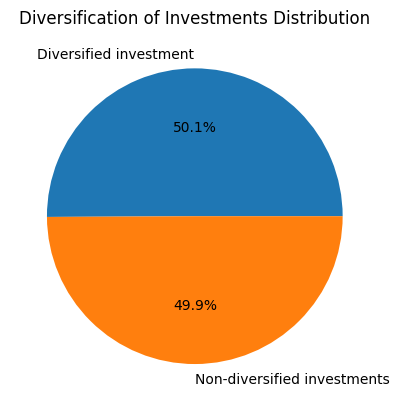

In [35]:
diversified = len(df3[df3['Diversification'] == 'diversified'])
not_diversified = len(df3[df3['Diversification'] == 'not diversified'])
plt.pie([diversified, not_diversified] ,  labels=['Diversified investment', 'Non-diversified investments'], autopct='%1.1f%%')
plt.title("Diversification of Investments Distribution")

Now I will create the 4th set of data that is generated on the play store and the app store. To simplify the data generation process, I have assumed that all the users have gave ratings and reviews for the app on the Playstore or Appstore

1. Customer ratings for the app
2. Customer reviews for the app
3. Number of downloads of the app during a timeframe

In [36]:
new_data = []
for i in range(len(names)):
    ratings = np.random.randint(1, 5)
    review_text = fake.random_element(elements=('The product is great', 'Product is waste of time'))
    new_data.append([names[i], ids[i], ratings, review_text])


# Create a new DataFrame
df4 = pd.DataFrame(new_data, columns=["Name", "ID", "Customer Rating","Customer Review"])

df4.to_csv("Playstore and Appstore Dataset.csv", index=False)

In [37]:
df4

,Name,ID,Customer Rating,Customer Review
0,Janice Cook,1,4,Product is waste of time
1,Aimee Flores,2,2,Product is waste of time
2,Caitlin Mitchell,3,2,The product is great
3,Jordan King,4,2,The product is great
4,Angela Martin,5,2,Product is waste of time
...,...,...,...,...
9995,Benjamin Duran,9996,4,Product is waste of time
9996,Kyle Keller,9997,4,The product is great
9997,Alexis Hawkins,9998,4,Product is waste of time
9998,Christopher Barnes,9999,4,Product is waste of time


Text(0.5, 1.0, 'Customer Ratings Distribution')

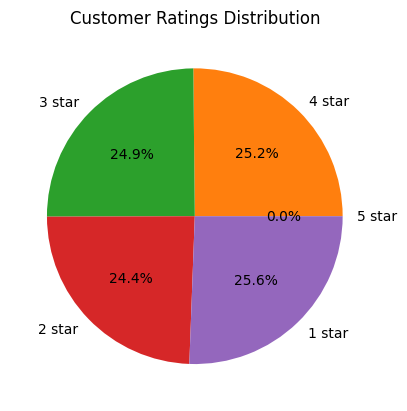

In [38]:
a = len(df4[df4['Customer Rating']==5])
b = len(df4[df4['Customer Rating']==4])
c= len(df4[df4['Customer Rating']==3])
d = len(df4[df4['Customer Rating']==2])
e = len(df4[df4['Customer Rating']==1])
plt.pie([a, b, c, d, e], labels=['5 star','4 star','3 star','2 star','1 star'], autopct='%1.1f%%')
plt.title('Customer Ratings Distribution')

In [39]:
review_data = []
for i in range(len(df4)):
  if df4['Customer Rating'][i]<3:
    review_data.append(df4['Customer Review'])

In [40]:
len(review_data)

4995

In [41]:
review_data = pd.DataFrame(review_data)
review_data.to_csv('The negative ratings reviews.csv', index=False)

Here we are assuming that the number of app downloads during the selected timeframe is 5000

In [42]:
num_of_downloads_during_timeframe = 5000
print(f"The number of downloads of the app during the selected timeperiod is {num_of_downloads_during_timeframe}")
print(f"The number of new users during that same time is {num_accounts}")
conversion_of_downloads_to_new_users = num_accounts/num_of_downloads_during_timeframe
non_conversion_of_downloads_to_new_users = ((num_of_downloads_during_timeframe - num_accounts)/num_of_downloads_during_timeframe)
print(f"The percentage of conversion of downloads of app to new users is {conversion_of_downloads_to_new_users*100}%")

The number of downloads of the app during the selected timeperiod is 5000
The number of new users during that same time is 2178
The percentage of conversion of downloads of app to new users is 43.56%


Text(0.5, 1.0, 'Conversion of Downloads to Users Distribution Plot')

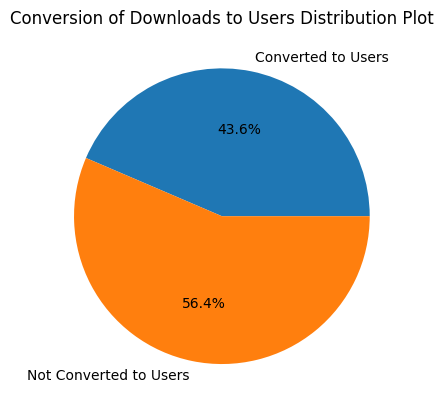

In [43]:
plt.pie([conversion_of_downloads_to_new_users, non_conversion_of_downloads_to_new_users], labels = ["Converted to Users","Not Converted to Users"], autopct='%1.1f%%')
plt.title("Conversion of Downloads to Users Distribution Plot")

The main competitors of CashRich Platform are as follows:
1. Groww
2. Scripbox
3. Kuvera
4. Zerodha
5. ET Money
6. Upstox

Since the companies are not publicly traded on the stock market, we can not gather much information about those companies. But we can easily get their social media reach from their social media accounts. So I am compiling a file while gathering data of their social media reach in terms of followers as dated on 12th Feb 2024

In [44]:
data1 = {
    'Companies'  : ['CashRich', 'Groww', 'Kuvera', 'Zerodha','Scripbox', 'ET Money', 'Upstox'],
    'YouTube' : [330, 2200000, 19700, 591000, 31700, 395000, 912000],
    'Instagram' : [71, 1200000, 20000, 256000, 10600, 273000, 185000],
    'LinkedIn' : [2301, 398466, 11223, 424189, 56297, 32465, 115405]
}

social_media_data = pd.DataFrame(data1)

In [45]:
social_media_data

,Companies,YouTube,Instagram,LinkedIn
0,CashRich,330,71,2301
1,Groww,2200000,1200000,398466
2,Kuvera,19700,20000,11223
3,Zerodha,591000,256000,424189
4,Scripbox,31700,10600,56297
5,ET Money,395000,273000,32465
6,Upstox,912000,185000,115405


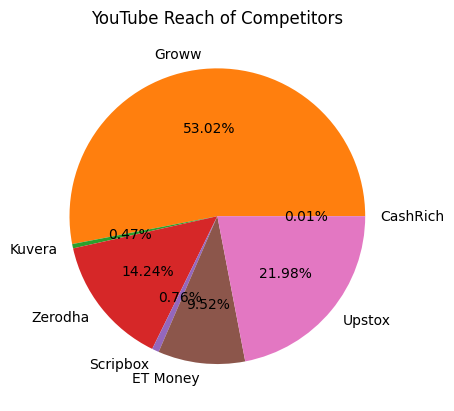

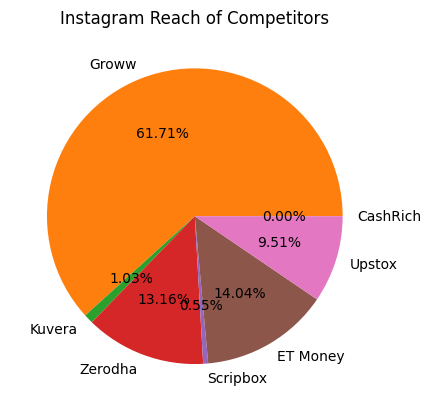

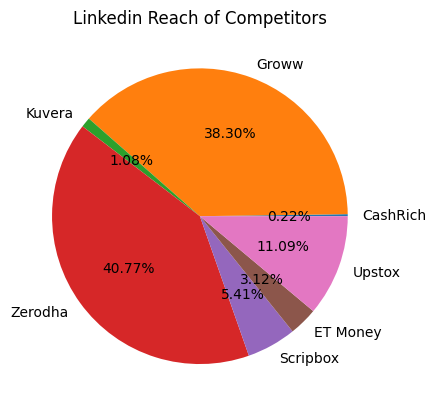

In [46]:
companies = social_media_data['Companies']
youtube_followers = social_media_data['YouTube']
instagram_followers = social_media_data['Instagram']
linkedin_followers = social_media_data['LinkedIn']

plt.pie(youtube_followers, labels=companies, autopct='%1.2f%%')
plt.title("YouTube Reach of Competitors")
plt.show()

plt.pie(instagram_followers, labels=companies, autopct='%1.2f%%')
plt.title("Instagram Reach of Competitors")
plt.show()

plt.pie(linkedin_followers, labels=companies, autopct='%1.2f%%')
plt.title("Linkedin Reach of Competitors")
plt.show()

 We can also get the Revenues of the companies. So I am compiling a file while gathering the revenue data.

In [47]:
data2 = {
    'Companies'  : ['CashRich', 'Groww', 'Kuvera', 'Zerodha','Scripbox', 'ET Money', 'Upstox'],
    'Revenue in Crore of Rupees' : [0.61, 1277, 0.96, 6500, 64, 149, 765]
}

revenue_data = pd.DataFrame(data2)

In [48]:
revenue_data

,Companies,Revenue in Crore of Rupees
0,CashRich,0.61
1,Groww,1277.00
2,Kuvera,0.96
3,Zerodha,6500.00
4,Scripbox,64.00
5,ET Money,149.00
6,Upstox,765.00


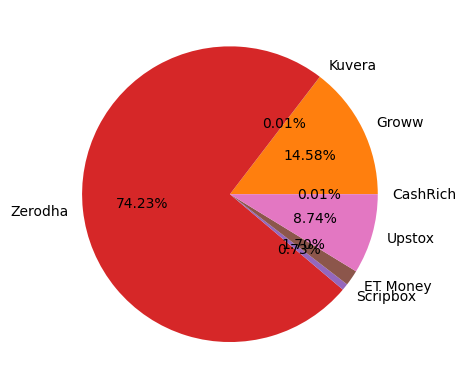

In [49]:
companies = revenue_data['Companies']
revenue = revenue_data['Revenue in Crore of Rupees']

plt.pie(revenue, labels=companies, autopct='%1.2f%%')
plt.show()

We can also get the Ratings of the companies on PlayStore. So I am compiling a file while gathering the ratings data.

In [50]:
data3 = {
    'Companies'  : ['CashRich', 'Groww', 'Kuvera', 'Zerodha','Scripbox', 'ET Money', 'Upstox'],
    'Ratings in Play Store' : [4.7, 4.4, 4.4, 3.8, 3.7, 4.4, 4.4]
}

ratings_data = pd.DataFrame(data3)

In [51]:
ratings_data

,Companies,Ratings in Play Store
0,CashRich,4.7
1,Groww,4.4
2,Kuvera,4.4
3,Zerodha,3.8
4,Scripbox,3.7
5,ET Money,4.4
6,Upstox,4.4


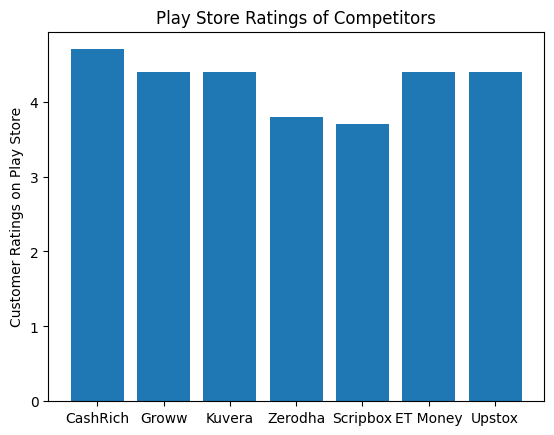

In [52]:
companies = ratings_data['Companies']
ratings = ratings_data['Ratings in Play Store']

plt.bar(companies, ratings)
plt.ylabel("Customer Ratings on Play Store")
plt.title("Play Store Ratings of Competitors")
plt.show()

So we have done competitor analysis with the datapoints that we have got from the internet.
The 3 points of competitor analysis were:
1. Revenue
2. Social media presence
3. Customer ratings of the app on Play store